In [282]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [283]:
data = pd.read_csv("C:\\Users\\nicol\\OneDrive\\שולחן העבודה\\תעשיה וניהול\\תואר שני\\שנה א\\סמסטר א\\שיטות מחקר מתקדמות בייצור ושירות\\calc_participant_participation_order.csv")
df=data[data.Scenario.isin(['Spatial'])].reset_index().copy()

------------

### Information about the data (befor selection and cleaning)

In [284]:
df.shape

(439, 239)

In [285]:
df

,index,Id,Scenario,Condition,triggered_by,WorldTime,TerminationTime,Samples,Duration,WithinScenarioOrder,...,Semantic,TTC,Latency,Informative,CommonFace,CommonColor,Mood,Fatigue,PreferredInterface,EffectiveInterfaceForSafeDriving
0,9,A1_012594,Spatial,Allocentric,Egocar,1900-01-01 11:34:18,1900-01-01 11:38:55,4677.0,277.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,A1_012594,Spatial,Egocentric,Egocar,1900-01-01 11:24:42,1900-01-01 11:30:06,5313.0,324.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,A1_018183,Spatial,Allocentric,Egocar,1900-01-01 11:49:29,1900-01-01 11:53:31,4473.0,242.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,A1_018183,Spatial,Egocentric,Egocar,1900-01-01 11:38:32,1900-01-01 11:43:47,5624.0,315.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42,A1_036689,Spatial,Allocentric,Egocar,1900-01-01 15:28:05,1900-01-01 15:32:04,4397.0,239.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2627,A6_557781,Spatial,Allocentric,Egocar,1900-01-01 13:19:47,1900-01-01 13:22:23,954.0,156.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,2633,A6_563247,Spatial,Allocentric,Egocar,1900-01-01 15:28:37,1900-01-01 15:35:57,7792.0,440.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2634,A6_563247,Spatial,Egocentric,Egocar,1900-01-01 15:43:27,1900-01-01 15:48:44,6256.0,317.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,2640,A6_569604,Spatial,Allocentric,Egocar,1900-01-01 12:54:13,1900-01-01 12:59:28,5580.0,315.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [286]:
df.columns.tolist()

['index',
 'Id',
 'Scenario',
 'Condition',
 'triggered_by',
 'WorldTime',
 'TerminationTime',
 'Samples',
 'Duration',
 'WithinScenarioOrder',
 'WithinIDOrder',
 'Reason',
 'RealTime',
 'Distance_Driven',
 'EGOlocAtTermination',
 'SimulationTime',
 'collision',
 'NavigationError',
 'ExtreemBrakingEvents',
 'NegativeFeedbackEvents',
 'Timestamp',
 'Mental Demand',
 'Physical Demand',
 'Temporal Demand',
 'Performance',
 'Effort',
 'Frustration',
 'Performance (reverse)',
 'NASATlx.Overall',
 'right_order',
 'ECG_Quality.mean',
 'ECG_Quality.quantile.80',
 'ECG_Quality.quantile.90',
 'ECG_Quality.quantile.95',
 'ECG_Quality.std',
 'ECG_Rate.max',
 'ECG_Rate.mean',
 'ECG_Rate.quantile.85',
 'ECG_Rate.std',
 'ECG_Rate_Mean.max',
 'ECG_Rate_Mean.mean',
 'ECG_Rate_Mean.quantile.85',
 'ECG_Rate_Mean.std',
 'EDA_Phasic.max',
 'EDA_Phasic.mean',
 'EDA_Phasic.quantile.85',
 'EDA_Phasic.std',
 'EDA_Tonic.max',
 'EDA_Tonic.mean',
 'EDA_Tonic.quantile.85',
 'EDA_Tonic.std',
 'HRV_HF.max',
 'HRV_HF

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Columns: 239 entries, index to EffectiveInterfaceForSafeDriving
dtypes: float64(214), int64(1), object(24)
memory usage: 819.8+ KB


------------

### Creating my data- 

#### removing rows with a missing dependent value and selecting features

In [288]:
# From the 'EGOlocAtTermination' column we will create the prediction column (y)
df = df.dropna(subset=['EGOlocAtTermination'])

In [289]:
# The features of the demographic questionnaire and features that I want to explore further
df=df[['Id','Scenario','Condition','WithinScenarioOrder','EGOlocAtTermination',
      'Age','Gender',
 'status',
 'experience simulator',
 'license years',
 'experience computer games',
 'accident non-keeping distance',
 'number of times',
 'technologies life easier',
 'understand technology',
 'enjoy understanding technology']]
 

In [290]:
df.shape

(389, 16)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 0 to 438
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              389 non-null    object 
 1   Scenario                        389 non-null    object 
 2   Condition                       389 non-null    object 
 3   WithinScenarioOrder             389 non-null    float64
 4   EGOlocAtTermination             389 non-null    object 
 5   Age                             381 non-null    float64
 6   Gender                          381 non-null    object 
 7   status                          381 non-null    object 
 8   experience simulator            381 non-null    object 
 9   license years                   381 non-null    float64
 10  experience computer games       381 non-null    object 
 11  accident non-keeping distance   381 non-null    object 
 12  number of times                 381 non-n

In [292]:
df.head()

,Id,Scenario,Condition,WithinScenarioOrder,EGOlocAtTermination,Age,Gender,status,experience simulator,license years,experience computer games,accident non-keeping distance,number of times,technologies life easier,understand technology,enjoy understanding technology
0,A1_012594,Spatial,Allocentric,2.0,end Right turn into the parking lot,24.0,Male,תואר ראשון - שנה שניה,לא,7.0,לא,לא,0,5.0,4.0,4.0
1,A1_012594,Spatial,Egocentric,1.0,end Right turn into the parking lot,24.0,Male,תואר ראשון - שנה שניה,לא,7.0,לא,לא,0,5.0,4.0,4.0
2,A1_018183,Spatial,Allocentric,2.0,end Right turn into the parking lot,24.0,Male,תואר ראשון - שנה שניה,לא,5.0,כן,לא,0,5.0,4.0,5.0
3,A1_018183,Spatial,Egocentric,1.0,end Right turn into the parking lot,24.0,Male,תואר ראשון - שנה שניה,לא,5.0,כן,לא,0,5.0,4.0,5.0
4,A1_036689,Spatial,Allocentric,2.0,end Right turn into the parking lot,24.0,Female,תואר ראשון - שנה שניה,לא,6.0,לא,לא,0,4.0,3.0,5.0


#### Creating the prediction column (y)

In [293]:
# The locations considered as scenario end points
end_list = ['end Right turn into the parking lot', 'start Right turn into the parking lot']

# True= finish the scenario
# False= didn't finish the scenario
df['Finished'] = df['EGOlocAtTermination'].isin(end_list)#.astype(int)


In [294]:
# for check
df[['EGOlocAtTermination','Finished']]

,EGOlocAtTermination,Finished
0,end Right turn into the parking lot,True
1,end Right turn into the parking lot,True
2,end Right turn into the parking lot,True
3,end Right turn into the parking lot,True
4,end Right turn into the parking lot,True
...,...,...
434,end Left turn at an intersection with stop sign 1,False
435,end Right turn into the parking lot,True
436,end Right turn into the parking lot,True
437,end Right turn into the parking lot,True


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              389 non-null    object 
 1   Scenario                        389 non-null    object 
 2   Condition                       389 non-null    object 
 3   WithinScenarioOrder             389 non-null    float64
 4   EGOlocAtTermination             389 non-null    object 
 5   Age                             381 non-null    float64
 6   Gender                          381 non-null    object 
 7   status                          381 non-null    object 
 8   experience simulator            381 non-null    object 
 9   license years                   381 non-null    float64
 10  experience computer games       381 non-null    object 
 11  accident non-keeping distance   381 non-null    object 
 12  number of times                 381 non-n

--------------

### Preparing the data

In [296]:
#df.columns.tolist()

#### Text processing:

[ 'experience simulator' , 'experience computer games' , 'number of times' , 'number of times' , 'accident non-keeping distance' ]

'experience simulator' -

In [297]:
df['experience simulator'].unique()

array(['לא', 'לא, אין ניסיון',
       'כן, בצבא הביאו לא מעט פעמים סימולטור נהיגה על מנת להמחיש תחושה של נהיגה בשכרות והסחות דעת. ',
       nan, 'אין', 'כן, אור ירוק', 'כן. בצבא במספר קורסים מבצעיים',
       'כן בתור ילד', 'אין ניסיון'], dtype=object)

In [298]:
def TextTo_Yes1_No0(answer):
    if pd.isna(answer): # for NaN values 
        return 0    
    elif 'כן' in str(answer):
        return 1
    elif answer in ['אין ניסיון', 'אין', 'לא', 'ללא ניסיון','.לא','כמעט ולא', 'לא.','לא, אין ניסיון']:
        return 0
    else:
        return 1
    

In [299]:
df['experience simulator']=df['experience simulator'].apply(TextTo_Yes1_No0)

In [300]:
#Check that we have taken care of all the values
df['experience simulator'].unique()

array([0, 1], dtype=int64)

'experience computer games' -

In [301]:
df['experience computer games'].unique()

array(['לא', 'כן', 'כן מעט', 'אין ניסיון', 'כן.',
       'כן, שנה ניסיון בneed for speed.',
       'כן, nfs גם במחשב וגם בקונסולות, אבל ללא הגה. ', nan, 'ניסיון קל',
       'כן, כשהייתי קטנה שיחקתי', 'כן need for speed', 'כמעט ולא',
       'כן, משחקים בסמארטפון.', 'כן זוהי שאלה כפולה ',
       'כן, nned for speed', 'כן שיחקתי בעבר עם הגה חיצוני', '0',
       'מעט מאוד', 'כן שיחקתי בNEEDFOR SPEED עם הגה',
       'קצת שיחקתי בneed for speed', 'לא.', 'כן... הייתי משחק הרבה כילד',
       'יש ניסיון , אם זה משחקי NEEF GOR SPEED , FORZA HOTIZON ',
       'כן,שיחקתי בעבר בתור ילד ', 'כן, רק need for speed', 'Gta',
       'כן שחקתי מעט ', 'כן ', 'כן כל מיני משחקים אבל אני לא גיימר',
       'forza?', 'כן F1 PlayStation', 'כן שיחקתי בXBOX',
       'רק בשנות החטיבה/תחילת תיכון', 'GTA', 'מעט כילד',
       'כן, מעט משחקים כמו f1 בטלפון (בודדים במהלך השנים)',
       'כן, אבל בקטנה ממש', 'כן , שיחקתי קצת בילדות ', 'קצת ממש', 'מעט',
       '8', 'מעט נסיון, שיחקתי בעבר כמה פעמים',
       'כן, need for 

In [302]:
df['experience computer games']=df['experience computer games'].apply(TextTo_Yes1_No0)

In [303]:
#Check that we have taken care of all the values
df['experience computer games'].unique()

array([0, 1], dtype=int64)

'number of times' -

In [304]:
df['number of times'].unique()

array(['0', nan, '1', 'פעם אחת', '2', 'פעמיים', 'לא'], dtype=object)

In [305]:
def TextTo_numeric(answer):
    if pd.isna(answer) or answer=='לא': # for NaN values 
        return 0    
    elif answer=='פעם אחת':
        return 1
    elif answer=='פעמיים':
        return 2

    else:
        return int(answer)

In [306]:
df['number of times']=df['number of times'].apply(TextTo_numeric)

In [307]:
#Check that we have taken care of all the values
df['number of times'].unique()

array([0, 1, 2], dtype=int64)

'accident non-keeping distance'-

In [308]:
df['accident non-keeping distance'].unique()

array(['לא', nan, 'כן', 'כן, לא'], dtype=object)

In [309]:
df['accident non-keeping distance'] = df['accident non-keeping distance'].replace({'כן': 1, 'לא': 0})

# Remove rows with unclear answer 
df = df[df['accident non-keeping distance']!='כן, לא']

# If they didn't answer, it's probably because they haven't had an accident in the past >> 0
df['accident non-keeping distance'].fillna(0, inplace=True)

In [310]:
#Check that we have taken care of all the values
df['accident non-keeping distance'].unique()

array([0, 1], dtype=int64)

In [311]:
df.dropna(inplace=True)

In [312]:
df.isnull().sum()

Id                                0
Scenario                          0
Condition                         0
WithinScenarioOrder               0
EGOlocAtTermination               0
Age                               0
Gender                            0
status                            0
experience simulator              0
license years                     0
experience computer games         0
accident non-keeping distance     0
number of times                   0
technologies life easier          0
understand technology             0
enjoy understanding technology    0
Finished                          0
dtype: int64

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              373 non-null    object 
 1   Scenario                        373 non-null    object 
 2   Condition                       373 non-null    object 
 3   WithinScenarioOrder             373 non-null    float64
 4   EGOlocAtTermination             373 non-null    object 
 5   Age                             373 non-null    float64
 6   Gender                          373 non-null    object 
 7   status                          373 non-null    object 
 8   experience simulator            373 non-null    int64  
 9   license years                   373 non-null    float64
 10  experience computer games       373 non-null    int64  
 11  accident non-keeping distance   373 non-null    int64  
 12  number of times                 373 non-n

In [241]:
df.shape

(373, 18)

--------------------

## Neural Network

In [242]:
#pip install tensorflow

In [243]:
df_for_model=df.drop(['Id','Scenario', 'Reason','EGOlocAtTermination'], axis=1)

In [200]:
#df_for_model.columns.tolist()

In [244]:
df_for_model=df_for_model.copy()
df_for_model2=df_for_model.copy()

In [202]:
columns_to_encode = ['Gender', 'Condition', 'status']
df_for_model = pd.get_dummies(df_for_model, columns=columns_to_encode)

y = df_for_model['Finished']
X = df_for_model.drop(columns=['Finished'], inplace=False)

# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=40)

print("Data size:", len(df_for_model))
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train_scaled, y_train, epochs=35, batch_size=20, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Data size: 373
Train set size: 238
Validation set size: 60
Test set size: 75
Epoch 1/35
12/12 [==============================] - 2s 41ms/step - loss: 0.7749 - accuracy: 0.4832 - val_loss: 0.6752 - val_accuracy: 0.6167
Epoch 2/35
12/12 [==============================] - 0s 11ms/step - loss: 0.6604 - accuracy: 0.6303 - val_loss: 0.6026 - val_accuracy: 0.7000
Epoch 3/35
12/12 [==============================] - 0s 11ms/step - loss: 0.6045 - accuracy: 0.7185 - val_loss: 0.5752 - val_accuracy: 0.7000
Epoch 4/35
12/12 [==============================] - 0s 11ms/step - loss: 0.5840 - accuracy: 0.7479 - val_loss: 0.5580 - val_accuracy: 0.7333
Epoch 5/35
12/12 [==============================] - 0s 12ms/step - loss: 0.5660 - accuracy: 0.7479 - val_loss: 0.5542 - val_accuracy: 0.7667
Epoch 6/35
12/12 [==============================] - 0s 12ms/step - loss: 0.5534 - accuracy: 0.7479 - val_loss: 0.5514 - val_accuracy: 0.7667
Epoch 7/35
12/12 [==============================] - 0s 10ms/step - loss: 0.54

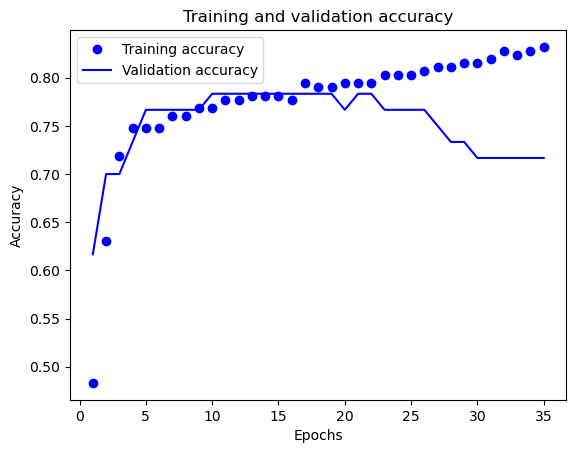

In [203]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs") 
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [245]:
#epochs=24

columns_to_encode = ['Gender', 'Condition', 'status']
df_for_model2 = pd.get_dummies(df_for_model2, columns=columns_to_encode)

y = df_for_model2['Finished']
X = df_for_model2.drop(columns=['Finished'], inplace=False)

# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=40)

print("Data size:", len(df_for_model))
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1=model.fit(X_train_scaled, y_train, epochs=10, batch_size=20, validation_data=(X_val_scaled, y_val))

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")

Data size: 373
Train set size: 238
Validation set size: 60
Test set size: 75
Epoch 1/10
12/12 [==============================] - 2s 48ms/step - loss: 0.8223 - accuracy: 0.4034 - val_loss: 0.6894 - val_accuracy: 0.5833
Epoch 2/10
12/12 [==============================] - 0s 11ms/step - loss: 0.7246 - accuracy: 0.5210 - val_loss: 0.6336 - val_accuracy: 0.6333
Epoch 3/10
12/12 [==============================] - 0s 12ms/step - loss: 0.6524 - accuracy: 0.6471 - val_loss: 0.6014 - val_accuracy: 0.7333
Epoch 4/10
12/12 [==============================] - 0s 12ms/step - loss: 0.6162 - accuracy: 0.6933 - val_loss: 0.5790 - val_accuracy: 0.7500
Epoch 5/10
12/12 [==============================] - 0s 10ms/step - loss: 0.5858 - accuracy: 0.7521 - val_loss: 0.5693 - val_accuracy: 0.7667
Epoch 6/10
12/12 [==============================] - 0s 11ms/step - loss: 0.5670 - accuracy: 0.7605 - val_loss: 0.5617 - val_accuracy: 0.7667
Epoch 7/10
12/12 [==============================] - 0s 9ms/step - loss: 0.553

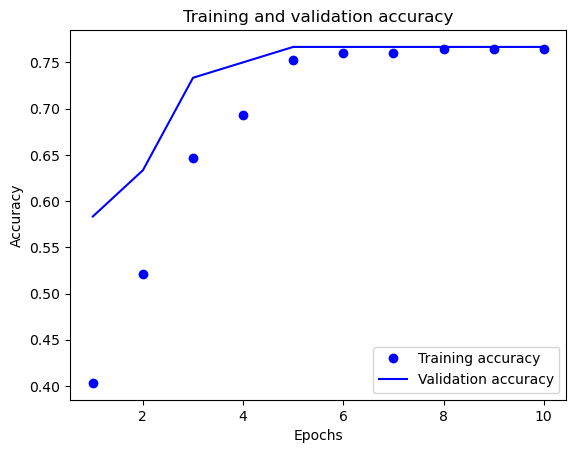

In [246]:
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.figure()
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs") 
plt.ylabel("Accuracy")
plt.legend()
plt.show()